<a href="https://colab.research.google.com/github/Shal1n1/Assignment-Submission/blob/main/FinalProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Project Description-
Given a Dataset which represents the parameters of customers. You have to predict if a customer is eligible for the loan or not and also find out what are the missing criteria why other customers are not eligible for the loan.

# Defining Dataset

In [347]:
train_set = pd.read_csv('/content/Training Data.csv')
test_set = pd.read_csv('/content/Testing Data.csv')

# Exploratory Data Analysis

# Data Description
- Total Random Variables = 13
- Target Variable = 1(Loan_Status)
- Feature Variables = 12
- Loan_ID----------------> Unique Loan ID.
- Gender ----------------> Male/ Female
- Married ---------------> Applicant married (Y/N)
- Dependents ------------> Number of dependents
- Education -------------> Applicant Education (Graduate/ Under Graduate)
- Self_Employed ---------> Self-employed (Y/N)
- ApplicantIncome -------> Applicant income
- CoapplicantIncome -----> Coapplicant income
- LoanAmount ------------> Loan amount in thousands
- Loan_Amount_Term ------> Term of a loan in months
- Credit_History --------> Credit history meets guidelines
- Property_Area ---------> Urban/ Semi-Urban/ Rural
- Loan_Status -----------> Loan approved (Y/N)

- Total variables ->13
- Feature variables ->12
- Target variable->1(Loan_Status)

In [348]:
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [349]:
train_set.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [350]:
train_set.shape

(614, 13)

In [351]:
train_set.shape[0]  # no. of rows

614

In [352]:
train_set.shape[1]  # no. of columns

13

In [353]:
train_set.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [354]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Have to work on Object Dtype Columns and null values present.

In [355]:
# Check null values in each columns
train_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [356]:
# Check null values present in the dataset
train_set.isnull().sum().sum()

149

- Sorting null/missing values of train_set dataset

In [357]:
train_set.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [358]:
train_set['Gender'].unique()   # no. of unique values in Gender column

array(['Male', 'Female', nan], dtype=object)

In [359]:
train_set['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [360]:
train_copy = train_set.copy()   # copy of the train_set

In [361]:
train_set.Gender.mode()[0]

'Male'

In [362]:
train_set['Gender'].fillna(train_set['Gender'].mode()[0], inplace =True)

In [363]:
train_set['Gender'].isnull().sum()

0

In [364]:
train_set['Self_Employed'].fillna(train_set['Self_Employed'].mode()[0], inplace=True)

In [365]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [366]:
train_set['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [367]:
train_set['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [368]:
train_set['Married'].fillna(train_set['Married'].mode()[0], inplace=True)

In [369]:

train_set['Dependents'].unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [370]:
train_set['Education'].unique()


array(['Graduate', 'Not Graduate'], dtype=object)

In [371]:
train_set['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [372]:
train_set['Dependents'].fillna(train_set['Dependents'].mode()[0], inplace=True)

In [373]:

train_set.loc[train_set.Dependents=='3+','Dependents']= 4

In [374]:
train_set['Self_Employed'].fillna(train_set['Self_Employed'].mode()[0], inplace=True)

In [375]:
train_set.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [376]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [377]:
train_copy.rename(columns={'LoanAmount':'Loan_Amount'}, inplace=True)

In [378]:
train_copy.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [379]:
train_set.rename(columns={'LoanAmount':'Loan_Amount'}, inplace=True)
train_set.rename(columns={'ApplicantIncome':'Applicant_Income'}, inplace=True)
train_set.rename(columns={'CoapplicantIncome':'Coapplicant_Income'}, inplace=True)

In [380]:
train_set.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [381]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [382]:
train_set['Loan_Amount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: Loan_Amount, dtype: float64

In [383]:
Loan_Amount_mean = train_set['Loan_Amount'].mean()

In [384]:
Loan_Amount_mean

146.41216216216216

In [385]:
train_set[train_set['Loan_Amount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,4,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [386]:
train_set['Loan_Amount'].fillna(Loan_Amount_mean, inplace=True)

In [387]:
train_set['Loan_Amount'].isnull().sum()

0

In [388]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [389]:
train_set['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [390]:
train_set['Loan_Amount_Term'].fillna(train_set['Loan_Amount_Term'].median(), inplace=True)

In [391]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    float64
 9   Loan_Amount_Term    614 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [392]:
train_set['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [393]:
train_set[train_set['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,4,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


In [394]:
train_set['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [395]:
train_set['Credit_History'].fillna(train_set['Credit_History'].median(), inplace=True)

In [396]:
train_set['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [397]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    float64
 9   Loan_Amount_Term    614 non-null    float64
 10  Credit_History      614 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [398]:
le = LabelEncoder()

In [399]:
train_set.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [400]:
train_set.Gender= le.fit_transform(train_set.Gender)

In [401]:
train_set.Gender.value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [402]:
train_set.Gender.value_counts()   # 1->Male , 0-> Female

1    502
0    112
Name: Gender, dtype: int64

In [403]:
train_set.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [404]:
train_set.Married= le.fit_transform(train_set.Married)

In [405]:
train_set.Married.value_counts()  # 1 -> yes , 0->No

1    401
0    213
Name: Married, dtype: int64

In [406]:
train_set.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [407]:
train_set.Education= le.fit_transform(train_set.Education)

In [408]:
train_set.Education.value_counts()  # 1 -> Not Graduate , 0 ->Graduate

0    480
1    134
Name: Education, dtype: int64

In [409]:
train_set.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [410]:
train_set.Self_Employed= le.fit_transform(train_set.Self_Employed)

In [411]:
train_set.Self_Employed.value_counts()  #1 -> yes, 0-> No

0    532
1     82
Name: Self_Employed, dtype: int64

In [412]:
train_set.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [413]:
train_set.Property_Area= le.fit_transform(train_set.Property_Area)

In [414]:
train_set.Property_Area.value_counts()  # 1 ->Semiurban , 2 -> Urban, 0 ->Rural

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [415]:
train_set.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [416]:
train_set.Loan_Status= le.fit_transform(train_set.Loan_Status)

In [417]:
train_set.Loan_Status.value_counts()  #1->Y, 0->N

1    422
0    192
Name: Loan_Status, dtype: int64

In [418]:
train_set['Loan_ID'] = train_set['Loan_ID'].str[2:]

In [419]:
train_set['Loan_ID'] =train_set['Loan_ID'].astype('int')

In [420]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    int64  
 1   Gender              614 non-null    int64  
 2   Married             614 non-null    int64  
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    int64  
 5   Self_Employed       614 non-null    int64  
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    float64
 9   Loan_Amount_Term    614 non-null    float64
 10  Credit_History      614 non-null    float64
 11  Property_Area       614 non-null    int64  
 12  Loan_Status         614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


# Data Modelling

In [421]:
X= train_set.drop(['Loan_ID','Loan_Status'],axis=1)
y = train_set['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [422]:
len(X_train)

491

In [423]:
len(X_test)

123

In [424]:
KNN = KNeighborsClassifier()
LR = LogisticRegression()
SVCL = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [425]:
KNN.fit(X_train, y_train)
LR.fit(X_train, y_train)
SVCL.fit(X_train, y_train)
DTC.fit(X_train, y_train)
RFC.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [426]:
knn_y_pred = KNN.predict(X_test)
lr_y_pred = LR.predict(X_test)
svc_y_pred = SVCL.predict(X_test)
dtc_y_pred = DTC.predict(X_test)
rfc_y_pred = RFC.predict(X_test)

In [427]:
final_df = pd.DataFrame({
    "Actual": y_test,
    "KNN": knn_y_pred,
    "LR": lr_y_pred,
    "SVC": svc_y_pred,
    "DTC": dtc_y_pred,
    "RFC": rfc_y_pred
})

In [428]:
final_df.head(10)

,Actual,KNN,LR,SVC,DTC,RFC
454,1,1,1,1,1,1
52,0,1,1,1,1,1
536,1,1,1,1,0,1
469,0,1,1,1,0,1
55,1,1,1,1,1,1
62,0,1,0,1,1,0
539,1,0,1,1,0,1
432,1,1,1,1,0,0
367,0,1,0,1,0,0
482,1,0,1,1,1,1


In [429]:
print(f'KNN -> {accuracy_score(y_test, knn_y_pred)}')
print(f'LR -> {accuracy_score(y_test, lr_y_pred)}')
print(f'SVC -> {accuracy_score(y_test, svc_y_pred)}')
print(f'DTC -> {accuracy_score(y_test, dtc_y_pred)}')
print(f'RFC -> {accuracy_score(y_test, rfc_y_pred)}')

KNN -> 0.6504065040650406
LR -> 0.8292682926829268
SVC -> 0.7317073170731707
DTC -> 0.6747967479674797
RFC -> 0.7886178861788617


# LogisticRegression gives more accuracy than other algorithms

# Sorting missing values of test dataset

In [430]:
test_set.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [431]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [432]:
test_set['Gender'].fillna(test_set['Gender'].mode()[0], inplace=True)

In [433]:
test_set['Dependents'].fillna(test_set['Dependents'].mode()[0], inplace=True)

In [434]:
test_set['Self_Employed'].fillna(test_set['Self_Employed'].mode()[0], inplace=True)

In [435]:
test_set.rename(columns={'LoanAmount':'Loan_Amount'}, inplace=True)

In [436]:
test_set['Loan_Amount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: Loan_Amount, dtype: float64

In [437]:
test_set['Loan_Amount'].fillna(test_set['Loan_Amount'].mean(), inplace=True)

In [438]:
test_set['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [439]:
test_set['Loan_Amount_Term'].fillna(test_set['Loan_Amount_Term'].mean(), inplace=True)

In [440]:
test_set['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [441]:
test_set['Credit_History'].fillna(test_set['Credit_History'].median(), inplace=True)

In [442]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   Loan_Amount        367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [443]:
test_set.Gender.value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [444]:
test_set.Gender = le.fit_transform(test_set.Gender)


In [445]:
test_set.Gender.value_counts()

1    297
0     70
Name: Gender, dtype: int64

In [446]:
test_set.Married = le.fit_transform(test_set.Married)

In [447]:
test_set.loc[test_set.Dependents=='3+','Dependents']= 4

In [480]:
test_set.Dependents = test_set.Dependents.astype('int')

In [448]:
test_set.Education = le.fit_transform(test_set.Education)

In [449]:
test_set.Self_Employed = le.fit_transform(test_set.Self_Employed)

In [450]:
test_set.Property_Area = le.fit_transform(test_set.Property_Area)

In [481]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   Loan_Amount        367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [482]:
X_test_set= test_set.drop(['Loan_ID'],axis=1)

In [483]:
X_test_set.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2


In [525]:

X_test_set.rename(columns={'ApplicantIncome':'Applicant_Income'}, inplace=True)
X_test_set.rename(columns={'CoapplicantIncome':'Coapplicant_Income'}, inplace=True)

In [526]:
test_set['Loan_Status']= lr.predict(X_test_set)

In [527]:
df=test_set[['Loan_ID','Loan_Status']]

In [528]:
df.loc[df.Loan_Status==0,'Loan_Status']='N'
df.loc[df.Loan_Status==1,'Loan_Status']='Y'

In [529]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [452]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    int64  
 1   Gender              614 non-null    int64  
 2   Married             614 non-null    int64  
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    int64  
 5   Self_Employed       614 non-null    int64  
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    float64
 9   Loan_Amount_Term    614 non-null    float64
 10  Credit_History      614 non-null    float64
 11  Property_Area       614 non-null    int64  
 12  Loan_Status         614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [485]:
train_set.corr()

<ipython-input-485-97f1dac84804>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr()


,Loan_ID,Gender,Married,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.027152,-0.015693,0.037547,0.034032,0.019331,0.039516,0.037626,-0.034219,-0.029891,-0.158826,0.011958
Gender,-0.027152,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.015693,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Education,0.037547,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.034032,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
Applicant_Income,0.019331,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
Coapplicant_Income,0.039516,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
Loan_Amount,0.037626,0.107930,0.147141,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.034219,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.029891,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<ipython-input-486-d86670c87b19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(), annot=True, cmap='Greens')


<Axes: >

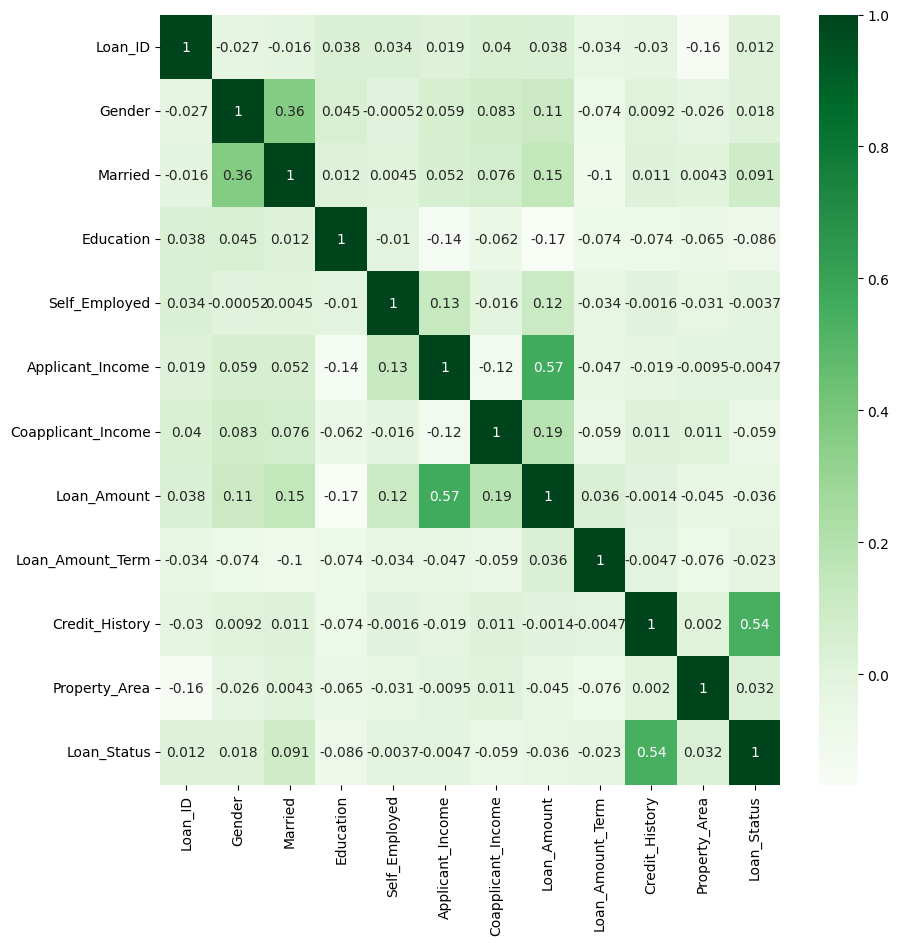

In [486]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(), annot=True, cmap='Greens')

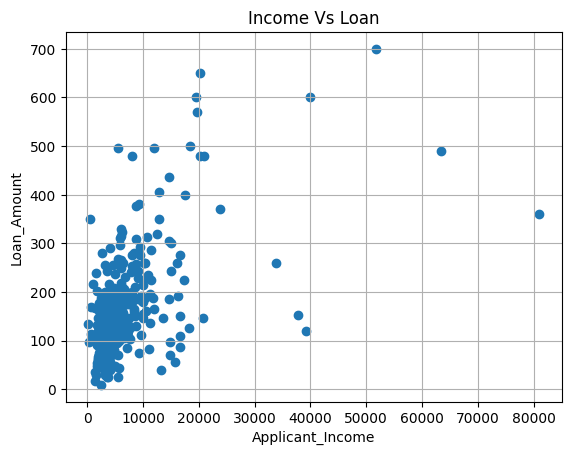

In [487]:
plt.scatter(train_set.Applicant_Income, train_set.Loan_Amount)
plt.xlabel('Applicant_Income')
plt.ylabel('Loan_Amount')
plt.title('Income Vs Loan')
plt.grid()

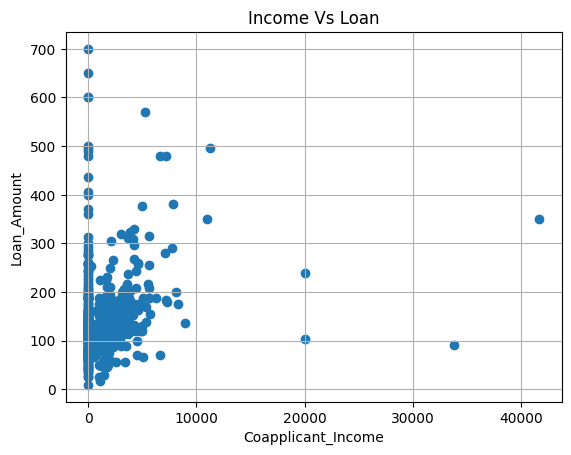

In [458]:
plt.scatter(train_set.Coapplicant_Income, train_set.Loan_Amount)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Loan_Amount')
plt.title('Income Vs Loan')
plt.grid()

In [497]:
train_set.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


# Feature Selection

In [510]:
X = train_set.drop('Loan_ID', axis=1)
y = train_set.Loan_Status

In [511]:
model = ExtraTreesClassifier()

In [513]:
model.fit(X,y)

ExtraTreesClassifier()

In [514]:
model.feature_importances_

array([0.00165368, 0.00420431, 0.00468891, 0.0028647 , 0.00202415,
       0.00701763, 0.00854723, 0.00779146, 0.00452908, 0.12667045,
       0.00626211, 0.82374629])

In [515]:
important_features = pd.Series(model.feature_importances_, index=X.columns)

In [516]:
important_features

Gender                0.001654
Married               0.004204
Dependents            0.004689
Education             0.002865
Self_Employed         0.002024
Applicant_Income      0.007018
Coapplicant_Income    0.008547
Loan_Amount           0.007791
Loan_Amount_Term      0.004529
Credit_History        0.126670
Property_Area         0.006262
Loan_Status           0.823746
dtype: float64

<Axes: >

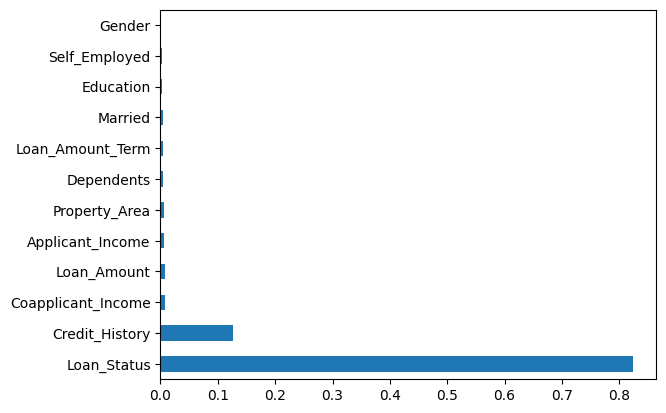

In [517]:
important_features.nlargest(20).plot(kind='barh')

# Exploratory Data Analysis (EDA)

- What's the ratio of Male to Female?

In [490]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = train_set['Gender'].value_counts()

# Calculate the male to female ratio
male_count = gender_counts.get(0, 0)
female_count = gender_counts.get(1, 0)

if female_count > 0:
    male_to_female_ratio = male_count / female_count
else:
    male_to_female_ratio = float('inf')  # To handle the case where there are no females

print("Gender counts:")
print(gender_counts)
print("\nMale to Female ratio:", male_to_female_ratio)

Gender counts:
1    502
0    112
Name: Gender, dtype: int64

Male to Female ratio: 0.22310756972111553


- How many Males are married and unmarried?

In [498]:
 data =train_set[train_set.Gender=='1'].groupby(train_set.Married)

In [499]:
data

- How many Females are married and non-married?

In [501]:
df = train_set[train_set.Gender==0].groupby(train_set.Married)

In [502]:
df

- How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [521]:


# Group by Gender, Marital_Status, and Education and count occurrences
result = train_set.groupby(['Gender', 'Married', 'Education']).size().reset_index(name='Count')

print(result)


   Gender  Married  Education  Count
0       0        0          0     66
1       0        0          1     14
2       0        1          0     26
3       0        1          1      6
4       1        0          0    102
5       1        0          1     31
6       1        1          0    286
7       1        1          1     83


- Which type of encoding will be required to perform on the "Education" column?


In [479]:
# LabelEncoding is being performed on the Education column we can also use replace function

-  Is it a male or a female whose loan amount is the highest?
**bold text**

In [505]:
highest_loan_row = train_set[train_set['Loan_Amount'] == train_set['Loan_Amount'].max()]

# Get the gender of the individual with the highest loan amount
highest_loan_gender = highest_loan_row['Gender'].values[0]

In [508]:
train_set.Gender.value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [506]:
highest_loan_gender  # Male has the highest loan Amount

1

-  the specification and information about the applicant who has the highest income?


In [509]:
train_set[train_set['Applicant_Income']==train_set['Applicant_Income'].max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,2317,1,1,4,0,0,81000,0.0,360.0,360.0,0.0,0,0


-  What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)


In [479]:
# Considering all the features except Loan_ID as it does not tell more about the income or the person salaried or not

-  Which model are you going to choose and define the reason for going with the same model?



In [479]:
#I have choosed logisticRegression model because it gives more accuracy 83%
#KNN -> 0.6504065040650406
#LR -> 0.8292682926829268
#SVC -> 0.7317073170731707
#DTC -> 0.6747967479674797
#RFC -> 0.7886178861788617

-  Have you performed the Hyper Parameter Tuning?


In [479]:
# No

-  Compare the Actual results with the Predicted results


In [518]:
final_df.head(10)

,Actual,KNN,LR,SVC,DTC,RFC
239,1,0,1,1,1,1
182,1,0,1,1,0,1
525,1,1,1,1,1,1
343,1,1,1,1,0,1
75,0,1,1,1,0,1
206,1,0,1,1,1,1
302,1,0,1,1,1,1
1,0,1,1,1,0,1
321,1,1,1,1,1,1
405,1,0,1,1,1,1


-  What's the accuracy of your model?


In [479]:
#accuracy of the model is 83%

-  In order to improve the accuracy, what more approaches can be done?


In [479]:
# using KNN and RFC hyperparmeter tuning we can try to improve the accuracy

-  What can you conclude with respect to the data?

In [479]:
# Loan_Amount and Credit_History and Apllicant_Income is more important for Loan Eligibility

In [530]:
df.to_csv('Loan Predictions.csv',index=0)